In [1]:
from sqlalchemy.engine.url import URL

DB_USERNAME = "bgd22_7666537" # YOUR USER NAME
DB_PASSWORD = "dKsqS87o" # YOUR PASSWORD
DB_SCHEMA = "public"
DB_HOSTNAME="gip.itc.utwente.nl"
DB_PORT=5434
DB_DATABASE="c211"



postgres_db = {'drivername': 'postgresql',
               'username': DB_USERNAME,
               'password': DB_PASSWORD,
               'host': DB_HOSTNAME,
               'port': DB_PORT,
               'database': DB_DATABASE}

db_url = URL.create(**postgres_db)

In [2]:
from sqlalchemy import create_engine

engine = create_engine(
    db_url, isolation_level="AUTOCOMMIT", pool_size=10, max_overflow=20)

In [6]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [8]:
df2017st_observations_query = "SELECT block, COUNT(*) as nb_observations, COUNT(DISTINCT observer) as nb_observers "\
    "FROM public.observation "\
    "WHERE latit != '0' "\
    "AND obsdate >= '2017-01-01' AND obsdate <= '2017-06-30' "\
    "GROUP BY block;"

df2017st_observations = pd.read_sql(df2017st_observations_query, engine)

In [13]:
df2017st_observations.shape

(33535, 3)

In [9]:
query = "SELECT * FROM public.block WHERE latit != '0';"
gdf_blocks = geopandas.GeoDataFrame.from_postgis(query, engine)

In [10]:
gdf_blocks.head()

,block,longit,latit,geom,urlnr
0,665001,199,329,"POLYGON ((199000.000 329000.000, 199000.000 33...",None
1,665002,182,337,"POLYGON ((182000.000 337000.000, 182000.000 33...",None
2,665003,202,347,"POLYGON ((202000.000 347000.000, 202000.000 34...",None
3,665004,192,306,"POLYGON ((192000.000 306000.000, 192000.000 30...",None
4,665005,171,357,"POLYGON ((171000.000 357000.000, 171000.000 35...",None


In [14]:
gdf_blocks.shape

(45074, 5)

In [23]:
gdf_observations = pd.merge(gdf_blocks, df2017st_observations, on = 'block')

In [24]:
gdf_observations.head()

,block,longit,latit,geom,urlnr,nb_observations,nb_observers
0,44609,177,310,"POLYGON ((177000.000 310000.000, 177000.000 31...",870135,78,18
1,44610,174,314,"POLYGON ((174000.000 314000.000, 174000.000 31...",870136,38,12
2,44611,174,320,"POLYGON ((174000.000 320000.000, 174000.000 32...",870137,38,5
3,44612,188,308,"POLYGON ((188000.000 308000.000, 188000.000 30...",870138,108,22
4,44613,177,309,"POLYGON ((177000.000 309000.000, 177000.000 31...",870139,240,19


In [25]:
gdf_observations.shape

(33535, 7)

In [27]:
query = "SELECT * FROM public.provinces; "
gdf_provinces = geopandas.GeoDataFrame.from_postgis(query, engine)

<AxesSubplot: >

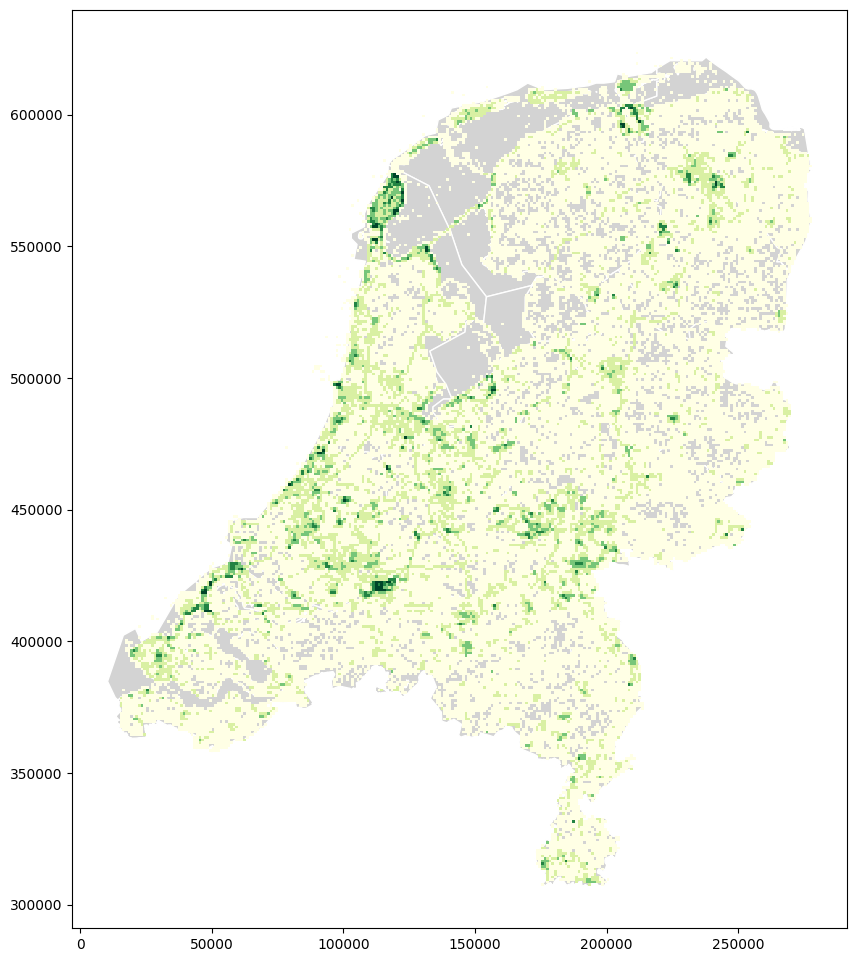

In [39]:
fg_observers, ax = plt.subplots(1, 1, figsize=(10, 15))
gdf_provinces.plot(ax=ax, color='lightgray', edgecolor='white')
gdf_observations.plot(ax=ax, column = 'nb_observers', cmap = 'YlGn', scheme='fisher_jenks')

In [40]:
fg_observers.savefig('2017firsthalfyear_observers_density.png', dpi = 300)

<AxesSubplot: >

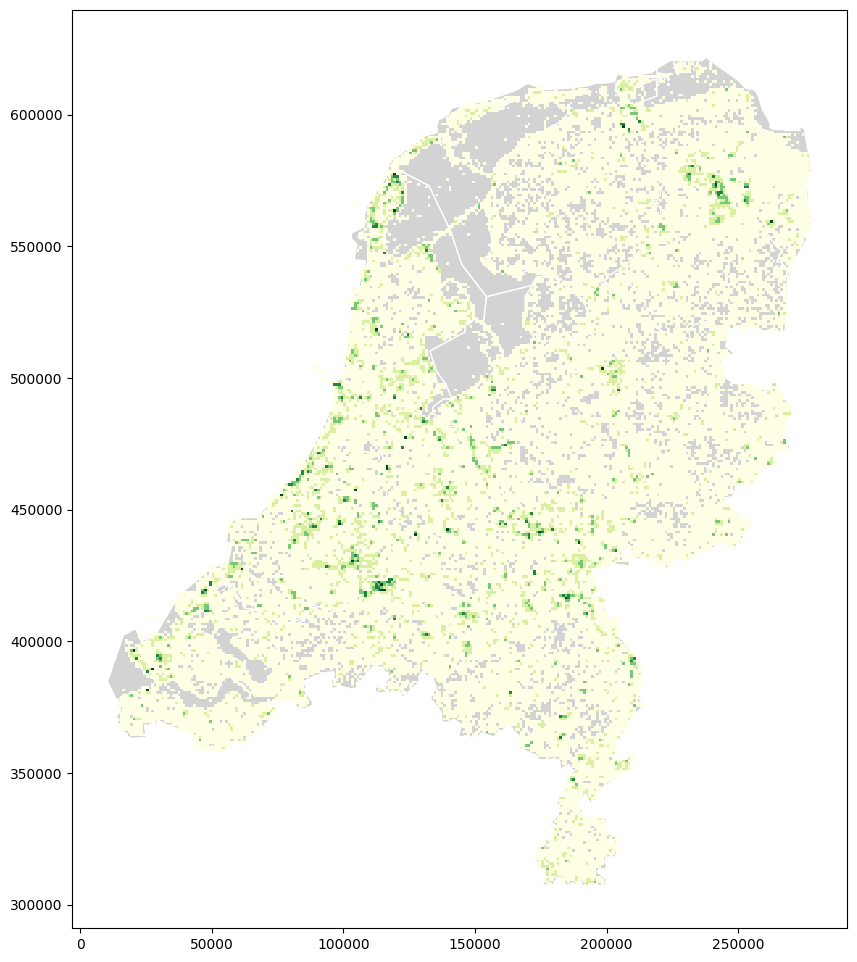

In [37]:
fg_observations, ax = plt.subplots(1, 1, figsize=(10, 15))
gdf_provinces.plot(ax=ax, color='lightgray', edgecolor='white')
gdf_observations.plot(ax=ax, column = 'nb_observations', cmap = 'YlGn', scheme='fisher_jenks')

In [38]:
fg_observations.savefig('2017firsthalfyear_observations_density.png', dpi = 300)